# Traffic Data Cleansing & Curation

Let's import the relevant datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to make all outputs show
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# !!! Rewrite local file path !!! 
file_1= 'Accident_Information.csv'
file_2= 'Vehicle_Information.csv'

report_1 = pd.read_csv(file_1, index_col = 0, low_memory = False)
report_2 = pd.read_csv(file_2, encoding='latin1', index_col = 0, low_memory = False)


In [3]:
report_1.shape

(2047256, 33)

In [4]:
report_2.shape

(2177205, 23)

In [5]:
report_1.head(2) #Accident
report_2.head(2) #Vehicle


,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,Data missing or out of range,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No


,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,ROVER,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,BMW,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004


In [6]:
#Let's inner merge the 2 files into 1 dataset.
dataset = report_1.merge(report_2, on='Accident_Index', how='inner')
dataset.head()


,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,...,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
200501BS00006,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-11,Tuesday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005


In [7]:
#let's get rid of the accident index, as it is irrelevant to our analysis
dataset.reset_index(inplace = True, drop = True)
dataset.head(2)
dataset.shape

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005


(2058408, 56)

In [8]:
# Create 1st backup after merging complete dataset
dataset_bk1 = dataset.copy()

In [9]:
#let's take a general look at the variables involved
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058408 entries, 0 to 2058407
Data columns (total 56 columns):
1st_Road_Class                                 object
1st_Road_Number                                float64
2nd_Road_Class                                 object
2nd_Road_Number                                float64
Accident_Severity                              object
Carriageway_Hazards                            object
Date                                           object
Day_of_Week                                    object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                               object
Junction_Detail                                object
Latitude                                       float64
Light_Conditions                               object
Local_Authority_(District)                     object
Local_Authority_(Highway)                      object
Location_Easting_OSGR                          float64
Location_Northing_

In [10]:
#let's take a closer look at nulls within columns
null_columns=dataset.columns[dataset.isnull().any()]
dataset[null_columns].isnull().sum() 

1st_Road_Number                                     1
2nd_Road_Class                                 827937
2nd_Road_Number                                 18927
Did_Police_Officer_Attend_Scene_of_Accident       114
Latitude                                          124
Location_Easting_OSGR                             124
Location_Northing_OSGR                            124
Longitude                                         125
LSOA_of_Accident_Location                      139207
Pedestrian_Crossing-Human_Control                 654
Pedestrian_Crossing-Physical_Facilities          1370
Speed_limit                                        65
Time                                              146
InScotland                                         44
Age_of_Vehicle                                 337962
Driver_IMD_Decile                              689290
Engine_Capacity_.CC.                           250317
make                                           110845
model                       

**Accident_severity** has no null values , which is great because that is our target variable.

We will need to drop variables that are unnecessary:
- Since we have **latitude and longitude**, the following are redundant:
    - 1st_Road_Number
    - 2nd_Road_Number
    - LSOA_of_Accident_Location
    - Location_Easting_OSGR
    - Location_Northing_OSGR

We will need to drop variables that mostly contain missing values:
- 2nd_Road_Class
- Driver_IMD_Decile

For variables that contain only a few missing values, we can either drop those records or replace them. Let's drop for now.
*(Typically, we would substitute numeric nulls with mean/median/mode. However, given the low volume of nulls and our need to make accurate recommendations to the UK government with as least unnecessary assumptions as possible, we can safely drop records that still contain nulls)*





In [11]:
#drop variables that are either redundant or unecessary
dataset.drop("1st_Road_Number", axis=1, inplace=True)
dataset.drop("2nd_Road_Number", axis=1, inplace=True)
dataset.drop("LSOA_of_Accident_Location", axis=1, inplace=True)
dataset.drop("Location_Easting_OSGR", axis=1, inplace=True)
dataset.drop("Location_Northing_OSGR", axis=1, inplace=True)

#drop variables that mostly contain missing values
dataset.drop("2nd_Road_Class", axis=1, inplace=True)
dataset.drop("Driver_IMD_Decile", axis=1, inplace=True)

In [12]:
dataset.shape

(2058408, 49)

In [13]:
# Drop rows with any missing values
dataset.dropna(how='any',inplace=True)

In [14]:
dataset.shape

(1555129, 49)

Even though about a quarter or our records were dropped, we are still left with **1.5 million** records to analyze.
Now that our data is clean of nulls, let's examine some trends.

In [15]:
dataset.head(2)

,1st_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
2,A,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
4,Unclassified,Slight,None,2005-01-11,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.515540,Daylight,...,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005


In [16]:
# Set a standard format for 'Date' for EDA
dataset['Date']= pd.to_datetime(dataset['Date'], format="%Y-%m-%d")

In [17]:
# Check for column datatype
dataset.iloc[:, 3:4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555129 entries, 2 to 2058407
Data columns (total 1 columns):
Date    1555129 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 23.7 MB


let's look further into some categoric vairables' values and see if they make sense.

In [19]:
dataset["1st_Road_Class"].unique()  #unknowns: 'Unclassified'
dataset["Accident_Severity"].unique() #need to reclassify into binary variable for model simplification
dataset["Carriageway_Hazards"].unique() #unknowns: 'Data missing or out of range'
#dataset["Date"].unique()
dataset["Day_of_Week"].unique()
dataset["Junction_Control"].unique() #unknowns: 'Data missing or out of range'
dataset["Junction_Detail"].unique() #unknowns: 'Data missing or out of range'
dataset["Light_Conditions"].unique() #unknowns: 'Data missing or out of range'
dataset["Local_Authority_(District)"].unique() #too many categories! might be unnecessary
dataset["Local_Authority_(Highway)"].unique() #too many categories! might be unnecessary
dataset["Police_Force"].unique()
dataset["Road_Surface_Conditions"].unique() #unknowns: 'Data missing or out of range'
dataset["Road_Type"].unique() #unknowns: 'Unknown'
dataset["Special_Conditions_at_Site"].unique() #unknowns: 'Data missing or out of range'
#dataset["Time"].unique()
dataset["Urban_or_Rural_Area"].unique() #unknowns: 'Unallocated' ... is that really unknown?
dataset["Weather_Conditions"].unique() #unknowns: 'Other', 'Unknown','Data missing or out of range'
dataset["InScotland"].unique() #might be an unnecessary location column
dataset["Age_Band_of_Driver"].unique() #unknowns/non-sensical data: 'Data missing or out of range','11 - 15','6 - 10', '0 - 5'
dataset["Driver_Home_Area_Type"].unique() #unknowns: 'Data missing or out of range'
dataset["Hit_Object_in_Carriageway"].unique() #unknowns: 'Data missing or out of range'
dataset["Hit_Object_off_Carriageway"].unique() #unknowns: 'Data missing or out of range'
dataset["Journey_Purpose_of_Driver"].unique() #unknowns: 'Other/Not known (2005-10)','Data missing or out of range','Not known','Other'
dataset["Junction_Location"].unique() #unknowns: 'Data missing or out of range'
dataset["make"].unique() #too many categories!
dataset["model"].unique() #too many categories!
dataset["Propulsion_Code"].unique()
dataset["Sex_of_Driver"].unique() #unknowns: 'Not known', 'Data missing or out of range'
dataset["Skidding_and_Overturning"].unique() #unknowns: 'Data missing or out of range'
dataset["Towing_and_Articulation"].unique() #unknowns: 'Data missing or out of range'
dataset["Vehicle_Leaving_Carriageway"].unique() #unknowns: 'Data missing or out of range'
dataset["Vehicle_Manoeuvre"].unique() #unknowns: 'Data missing or out of range'
dataset["Vehicle_Type"].unique()
dataset["Was_Vehicle_Left_Hand_Drive"].unique() #unknowns: 'Data missing or out of range'
dataset["X1st_Point_of_Impact"].unique() #unknowns: 'Data missing or out of range'

array(['A', 'Unclassified', 'C', 'B', 'Motorway', 'A(M)'], dtype=object)

array(['Slight', 'Serious', 'Fatal'], dtype=object)

array(['None', 'Other object on road',
       'Pedestrian in carriageway - not injured', 'Previous accident',
       'Vehicle load on road',
       'Any animal in carriageway (except ridden horse)',
       'Data missing or out of range'], dtype=object)

array(['Friday', 'Tuesday', 'Thursday', 'Sunday', 'Saturday', 'Wednesday',
       'Monday'], dtype=object)

array(['Data missing or out of range', 'Give way or uncontrolled',
       'Auto traffic signal', 'Stop sign', 'Authorised person',
       'Not at junction or within 20 metres'], dtype=object)

array(['Not at junction or within 20 metres', 'T or staggered junction',
       'Crossroads', 'Mini-roundabout', 'Private drive or entrance',
       'More than 4 arms (not roundabout)', 'Roundabout',
       'Other junction', 'Slip road', 'Data missing or out of range'],
      dtype=object)

array(['Daylight', 'Darkness - lights lit', 'Darkness - lights unlit',
       'Darkness - lighting unknown', 'Darkness - no lighting',
       'Data missing or out of range'], dtype=object)

array(['Kensington and Chelsea', 'Hammersmith and Fulham', 'Westminster',
       'City of London', 'Hackney', 'Islington', 'Camden', 'Brent',
       'Haringey', 'Barnet', 'Richmond upon Thames', 'Ealing',
       'Tower Hamlets', 'Hillingdon', 'London Airport (Heathrow)',
       'Hounslow', 'Waltham Forest', 'Redbridge', 'Barking and Dagenham',
       'Newham', 'Havering', 'Lambeth', 'Southwark', 'Croydon',
       'Wandsworth', 'Lewisham', 'Bromley', 'Bexley', 'Harrow',
       'Greenwich', 'Enfield', 'Kingston upon Thames', 'Merton', 'Sutton',
       'South Lakeland', 'Barrow-in-Furness', 'Carlisle', 'Eden',
       'Allerdale', 'Copeland', 'Blackpool', 'Fylde', 'Lancaster',
       'Blackburn with Darwen', 'Preston', 'Wyre', 'West Lancashire',
       'South Ribble', 'Chorley', 'Hyndburn', 'Ribble Valley', 'Pendle',
       'Rossendale', 'Burnley', 'Wirral', 'Sefton', 'Knowsley',
       'Liverpool', 'St. Helens', 'Manchester', 'Salford', 'Rochdale',
       'Trafford', 'Stockport', 'Wigan',

array(['Kensington and Chelsea', 'Hammersmith and Fulham', 'Westminster',
       'City of London', 'Hackney', 'Islington', 'Camden', 'Brent',
       'Haringey', 'Barnet', 'Richmond upon Thames', 'Ealing',
       'Tower Hamlets', 'Hillingdon', 'London Airport (Heathrow)',
       'Hounslow', 'Waltham Forest', 'Redbridge', 'Barking and Dagenham',
       'Newham', 'Havering', 'Lambeth', 'Southwark', 'Croydon',
       'Wandsworth', 'Lewisham', 'Bromley', 'Bexley', 'Harrow',
       'Greenwich', 'Enfield', 'Kingston upon Thames', 'Merton', 'Sutton',
       'Cumbria', 'Blackpool', 'Lancashire', 'Blackburn with Darwen',
       'Wirral', 'Sefton', 'Knowsley', 'Liverpool', 'St. Helens',
       'Manchester', 'Salford', 'Rochdale', 'Trafford', 'Stockport',
       'Wigan', 'Tameside', 'Bolton', 'Bury', 'Oldham', 'Warrington',
       'Cheshire East', 'Halton', 'Cheshire West and Chester',
       'Newcastle upon Tyne', 'Sunderland', 'North Tyneside',
       'Northumberland', 'South Tyneside', 'Gateshe

array(['Metropolitan Police', 'City of London', 'Cumbria', 'Lancashire',
       'Merseyside', 'Greater Manchester', 'Cheshire', 'Northumbria',
       'Durham', 'North Yorkshire', 'West Yorkshire', 'South Yorkshire',
       'Humberside', 'Cleveland', 'West Midlands', 'Staffordshire',
       'West Mercia', 'Warwickshire', 'Derbyshire', 'Nottinghamshire',
       'Lincolnshire', 'Leicestershire', 'Northamptonshire',
       'Cambridgeshire', 'Norfolk', 'Suffolk', 'Bedfordshire',
       'Hertfordshire', 'Essex', 'Thames Valley', 'Hampshire', 'Surrey',
       'Kent', 'Sussex', 'Devon and Cornwall', 'Avon and Somerset',
       'Gloucestershire', 'Wiltshire', 'Dorset', 'North Wales', 'Gwent',
       'South Wales', 'Dyfed-Powys', 'Northern', 'Grampian', 'Tayside',
       'Fife', 'Lothian and Borders', 'Central', 'Strathclyde',
       'Dumfries and Galloway'], dtype=object)

array(['Dry', 'Wet or damp', 'Snow', 'Frost or ice',
       'Flood over 3cm. deep', 'Data missing or out of range'],
      dtype=object)

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

array(['None', 'Oil or diesel', 'Auto signal part defective', 'Roadworks',
       'Road surface defective', 'Auto traffic signal - out',
       'Road sign or marking defective or obscured', 'Mud',
       'Data missing or out of range'], dtype=object)

array(['Urban', 'Rural', 'Unallocated'], dtype=object)

array(['Fine no high winds', 'Raining no high winds',
       'Snowing no high winds', 'Fine + high winds', 'Other', 'Unknown',
       'Raining + high winds', 'Fog or mist', 'Snowing + high winds',
       'Data missing or out of range'], dtype=object)

array(['No', 'Yes'], dtype=object)

array(['46 - 55', '26 - 35', '36 - 45', '66 - 75', '16 - 20', '56 - 65',
       'Data missing or out of range', '21 - 25', 'Over 75', '11 - 15',
       '6 - 10', '0 - 5'], dtype=object)

array(['Urban area', 'Data missing or out of range', 'Small town',
       'Rural'], dtype=object)

array(['None', 'Bollard or refuge', 'Open door of vehicle', 'Kerb',
       'Parked vehicle', 'Previous accident', 'Other object',
       'Road works', 'Central island of roundabout', 'Bridge (side)',
       'Any animal (except ridden horse)', 'Bridge (roof)',
       'Data missing or out of range'], dtype=object)

array(['None', 'Road sign or traffic signal', 'Other permanent object',
       'Lamp post', 'Central crash barrier', 'Near/Offside crash barrier',
       'Tree', 'Bus stop or bus shelter', 'Entered ditch',
       'Telegraph or electricity pole', 'Submerged in water',
       'Data missing or out of range', 'Wall or fence'], dtype=object)

array(['Other/Not known (2005-10)', 'Journey as part of work',
       'Commuting to/from work', 'Pupil riding to/from school',
       'Taking pupil to/from school', 'Data missing or out of range',
       'Not known', 'Other'], dtype=object)

array(['Not at or within 20 metres of junction',
       'Approaching junction or waiting/parked at junction approach',
       'Mid Junction - on roundabout or on main road',
       'Cleared junction or waiting/parked at junction exit',
       'Leaving roundabout', 'Entering main road',
       'Entering from slip road', 'Leaving main road',
       'Entering roundabout', 'Data missing or out of range'],
      dtype=object)

array(['NISSAN', 'AUDI', 'PIAGGIO', 'MERCEDES', 'JAGUAR', 'FORD', 'MCC',
       'BMW', 'PEUGEOT', 'HONDA', 'VAUXHALL', 'ROVER', 'LOTUS', 'SUZUKI',
       'SAAB', 'LONDON TAXIS INT', 'SUBARU', 'KAWASAKI', 'HYUNDAI',
       'LAND ROVER', 'VOLKSWAGEN', 'CITROEN', 'MINI', 'DUCATI', 'DAEWOO',
       'FIAT', 'METROCAB', 'YAMAHA', 'GILERA', 'RENAULT', 'MITSUBISHI',
       'TOYOTA', 'BUELL', 'TRIUMPH', 'PORSCHE', 'VOLVO', 'JEEP',
       'ASTON MARTIN', 'ALFA ROMEO', 'MG', 'TVR', 'SEAT', 'KIA',
       'CHRYSLER', 'SMART', 'SKODA', 'TAIWAN GOLDEN BEE', 'TAISHAN',
       'PROTON', 'MAZDA', 'HARLEY-DAVIDSON', 'KYMCO', 'LEXUS', 'KTM',
       'ISUZU TRUCKS', 'MOTO ROMA', 'CCM', 'MALAGUTI', 'JIALING', 'SYM',
       'ISUZU', 'DAIHATSU', 'DAF TRUCKS', 'BRANSON', 'PGO', 'LDV',
       'BENTLEY', 'AUSTIN', 'LADA', 'AUTO-TRAIL', 'PERODUA', 'Z Y MOTOR',
       'HILLMAN', 'DATSUN', 'LEYLAND DAF', 'APRILIA', 'CAGIVA',
       'CHEVROLET GMC', 'ITALJET', 'BAOTIAN', 'MASERATI', 'MORRIS',
       'DAIMLER', 'OPEL'

array(['ALMERA SE AUTO', 'A4 SPORT CABRIOLET AUTO', 'VESPA ET4', ...,
       'FA XF95.430', 'DAILY 35 C14 MWB', 'STRALIS AD260S33Y/PS S-A'],
      dtype=object)

array(['Petrol', 'Heavy oil', 'Hybrid electric', 'Gas/Bi-fuel',
       'Petrol/Gas (LPG)', 'Gas', 'New fuel technology', 'Gas Diesel',
       'Electric diesel'], dtype=object)

array(['Female', 'Male', 'Not known', 'Data missing or out of range'],
      dtype=object)

array(['None', 'Skidded', 'Overturned', 'Skidded and overturned',
       'Data missing or out of range', 'Jackknifed',
       'Jackknifed and overturned'], dtype=object)

array(['No tow/articulation', 'Other tow', 'Single trailer',
       'Articulated vehicle', 'Caravan', 'Double or multiple trailer',
       'Data missing or out of range'], dtype=object)

array(['Did not leave carriageway', 'Nearside', 'Offside',
       'Straight ahead at junction', 'Offside on to central reservation',
       'Offside - crossed central reservation',
       'Offside on to centrl res + rebounded', 'Nearside and rebounded',
       'Offside and rebounded', 'Data missing or out of range'],
      dtype=object)

array(['Going ahead other', 'Moving off', 'Parked', 'Turning left',
       'Turning right', 'Overtaking moving vehicle - offside', 'U-turn',
       'Waiting to go - held up', 'Overtaking static vehicle - offside',
       'Waiting to turn right', 'Going ahead left-hand bend',
       'Changing lane to right', 'Slowing or stopping',
       'Changing lane to left', 'Reversing', 'Overtaking - nearside',
       'Going ahead right-hand bend', 'Waiting to turn left',
       'Data missing or out of range'], dtype=object)

array(['Car', 'Motorcycle 125cc and under', 'Motorcycle over 500cc',
       'Motorcycle over 125cc and up to 500cc', 'Taxi/Private hire car',
       'Motorcycle 50cc and under', 'Van / Goods 3.5 tonnes mgw or under',
       'Minibus (8 - 16 passenger seats)',
       'Goods 7.5 tonnes mgw and over', 'Goods over 3.5t. and under 7.5t',
       'Other vehicle', 'Bus or coach (17 or more pass seats)',
       'Agricultural vehicle', 'Motorcycle - unknown cc',
       'Goods vehicle - unknown weight', 'Electric motorcycle'],
      dtype=object)

array(['No', 'Yes', 'Data missing or out of range'], dtype=object)

array(['Front', 'Did not impact', 'Back', 'Offside', 'Nearside',
       'Data missing or out of range'], dtype=object)

In [20]:
print("1st_Road_Class",":",(dataset["1st_Road_Class"]=='Unclassified').sum())
print("Carriageway_Hazards",":",(dataset["Carriageway_Hazards"]=='Data missing or out of range').sum())
print("Junction_Control",":",(dataset["Junction_Control"]=='Data missing or out of range').sum())
print("Junction_Detail",":",(dataset["Junction_Detail"]=='Data missing or out of range').sum())
print("Light_Conditions",":",(dataset["Light_Conditions"]=='Data missing or out of range').sum())
print("Road_Surface_Conditions",":",(dataset["Road_Surface_Conditions"]=='Data missing or out of range').sum())
print("Road_Type",":",(dataset["Road_Type"]=='Unknown').sum())
print("Special_Conditions_at_Site",":",(dataset["Special_Conditions_at_Site"]=='Data missing or out of range').sum())
print("Urban_or_Rural_Area",":",(dataset["Urban_or_Rural_Area"]=='Unallocated').sum())
print("Weather_Conditions",":",(dataset["Weather_Conditions"].isin(['Other','Unknown','Data missing or out of range'])).sum())
print("Age_Band_of_Driver",":",(dataset["Age_Band_of_Driver"].isin(['Data missing or out of range','11 - 15','6 - 10','0 - 5'])).sum())
print("Driver_Home_Area_Type",":",(dataset["Driver_Home_Area_Type"]=='Data missing or out of range').sum())
print("Hit_Object_in_Carriageway",":",(dataset["Hit_Object_in_Carriageway"]=='Data missing or out of range').sum())
print("Hit_Object_off_Carriageway",":",(dataset["Hit_Object_off_Carriageway"]=='Data missing or out of range').sum())
print("Journey_Purpose_of_Driver",":",(dataset["Journey_Purpose_of_Driver"].isin(['Other/Not known (2005-10)','Data missing or out of range','Not known','Other'])).sum())
print("Junction_Location",":",(dataset["Junction_Location"]=='Data missing or out of range').sum())
print("Sex_of_Driver",":",(dataset["Sex_of_Driver"].isin(['Not known','Data missing or out of range'])).sum())
print("Skidding_and_Overturning",":",(dataset["Skidding_and_Overturning"]=='Data missing or out of range').sum())
print("Towing_and_Articulation",":",(dataset["Towing_and_Articulation"]=='Data missing or out of range').sum())
print("Vehicle_Leaving_Carriageway",":",(dataset["Vehicle_Leaving_Carriageway"]=='Data missing or out of range').sum())
print("Vehicle_Manoeuvre",":",(dataset["Vehicle_Manoeuvre"]=='Data missing or out of range').sum())
print("Was_Vehicle_Left_Hand_Drive",":",(dataset["Was_Vehicle_Left_Hand_Drive"]=='Data missing or out of range').sum())
print("X1st_Point_of_Impact",":",(dataset["X1st_Point_of_Impact"]=='Data missing or out of range').sum())


1st_Road_Class : 412850
Carriageway_Hazards : 98
Junction_Control : 558205
Junction_Detail : 30
Light_Conditions : 9
Road_Surface_Conditions : 2022
Road_Type : 7320
Special_Conditions_at_Site : 110
Urban_or_Rural_Area : 15
Weather_Conditions : 58394
Age_Band_of_Driver : 107721
Driver_Home_Area_Type : 196154
Hit_Object_in_Carriageway : 95
Hit_Object_off_Carriageway : 19
Journey_Purpose_of_Driver : 1157832
Junction_Location : 1955
Sex_of_Driver : 41936
Skidding_and_Overturning : 109
Towing_and_Articulation : 167
Vehicle_Leaving_Carriageway : 66
Vehicle_Manoeuvre : 234
Was_Vehicle_Left_Hand_Drive : 5784
X1st_Point_of_Impact : 279


As with nulls, we will delete columns that contain mostly meaningless data. Otherwise, we will remove records with remaining meaningless values.

In [21]:
#drop variables that are unnecessary
dataset.drop("1st_Road_Class", axis=1, inplace=True)
dataset.drop("Junction_Control", axis=1, inplace=True)
dataset.drop("Journey_Purpose_of_Driver", axis=1, inplace=True)


In [22]:
dataset.shape

(1555129, 46)

In [23]:
#otherwise drop records with meaningless data
dataset=dataset[dataset["Carriageway_Hazards"]!='Data missing or out of range']
dataset=dataset[dataset["Junction_Detail"]!='Data missing or out of range']
dataset=dataset[dataset["Light_Conditions"]!='Data missing or out of range']
dataset=dataset[dataset["Road_Surface_Conditions"]!='Data missing or out of range']
dataset=dataset[dataset["Road_Type"]!='Unknown']
dataset=dataset[dataset["Special_Conditions_at_Site"]!='Data missing or out of range']
dataset=dataset[dataset["Urban_or_Rural_Area"]!='Unallocated']
dataset=dataset[~dataset["Weather_Conditions"].isin(['Other','Unknown','Data missing or out of range'])]
dataset=dataset[~dataset["Age_Band_of_Driver"].isin(['Data missing or out of range','11 - 15','6 - 10','0 - 5'])]
dataset=dataset[dataset["Driver_Home_Area_Type"]!='Data missing or out of range']
dataset=dataset[dataset["Hit_Object_in_Carriageway"]!='Data missing or out of range']
dataset=dataset[dataset["Hit_Object_off_Carriageway"]!='Data missing or out of range']
dataset=dataset[dataset["Junction_Location"]!='Data missing or out of range']
dataset=dataset[~dataset["Sex_of_Driver"].isin(['Not known','Data missing or out of range'])]
dataset=dataset[dataset["Skidding_and_Overturning"]!='Data missing or out of range']
dataset=dataset[dataset["Towing_and_Articulation"]!='Data missing or out of range']
dataset=dataset[dataset["Vehicle_Leaving_Carriageway"]!='Data missing or out of range']
dataset=dataset[dataset["Vehicle_Manoeuvre"]!='Data missing or out of range']
dataset=dataset[dataset["Was_Vehicle_Left_Hand_Drive"]!='Data missing or out of range']
dataset=dataset[dataset["X1st_Point_of_Impact"]!='Data missing or out of range']

In [24]:
dataset.shape

(1263105, 46)

In [25]:
# Create savepoint 2 
dataset_bk2= dataset.copy()

In [26]:
#create a new target variable column (numerical)
dataset.loc[dataset.Accident_Severity !='Slight', 'Target_Severe_Indicator'] = 1
dataset.loc[dataset.Accident_Severity =='Slight', 'Target_Severe_Indicator'] = 0


In [27]:
dataset["Target_Severe_Indicator"].value_counts()
dataset["Accident_Severity"].value_counts()

0.0    1084634
1.0     178471
Name: Target_Severe_Indicator, dtype: int64

Slight     1084634
Serious     162443
Fatal        16028
Name: Accident_Severity, dtype: int64

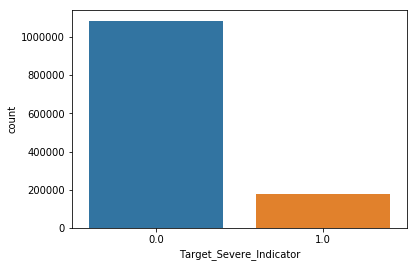

In [28]:
# Plot histrogram for the target class
# 0 - Slight
# 1 - Fatal+Serious
sns.countplot('Target_Severe_Indicator', data = dataset)

In [29]:
#create new column for time of day category (use Kevin's code for this)

# define a function that turns the hours into daytime groups
# !!!! Source: https://www.kaggle.com/brittabettendorf/visual-analysis-eda !!!!
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"
    
# slice first and second string from time column
dataset['Hour'] = dataset['Time'].str[0:2]

# convert new column to numeric datetype
dataset['Hour'] = pd.to_numeric(dataset['Hour'])

# drop null values in our new column
dataset = dataset.dropna(subset=['Hour'])

# cast to integer values
dataset['Hour'] = dataset['Hour'].astype('int')

# apply thus function to our temporary hour column
dataset['Daytime'] = dataset['Hour'].apply(when_was_it)
dataset[['Time', 'Hour', 'Daytime']].head(8)

,Time,Hour,Daytime
2,10:35,10,office hours (10-15)
4,12:40,12,office hours (10-15)
5,12:40,12,office hours (10-15)
7,20:40,20,evening (19-23)
8,17:35,17,afternoon rush (15-19)
9,00:42,0,night (23-5)
11,05:01,5,morning rush (5-10)
12,05:01,5,morning rush (5-10)


In [ ]:
dataset.info()

In [31]:
#dataset.drop("Did_Police_Officer_Attend_Scene_of_Accident", axis=1, inplace=True)
dataset.drop("Police_Force", axis=1, inplace=True)

#drop Time, Hour, as Daytime is sufficient 
dataset.drop("Time", axis=1, inplace=True)
dataset.drop("Hour", axis=1, inplace=True)
dataset.drop("Year_y", axis=1, inplace=True)


In [32]:
#since 'model' is a more detailed version of 'make', drop 'model' and keep 'make'
dataset.drop("model", axis=1, inplace=True)

#we can drop inscotland, as we already have sufficient location data for modelling
dataset.drop("InScotland", axis=1, inplace=True)

#we can drop 'Vehicle_reference', due to high correlation with 'Number_of_Vehicles'
dataset.drop("Vehicle_Reference", axis=1, inplace=True)

#we can drop 'Local_Authority_(District)' since it is a more detailed version of 'Local_Authority_(Highway)'
dataset.drop("Local_Authority_(District)", axis=1, inplace=True)



In [33]:
dataset.shape

(1263105, 41)

In [34]:
#check correlation between 'Was_Vehicle_Left_Hand_Drive' and  'Target_Severe_Indicator'

dataset.loc[dataset['Was_Vehicle_Left_Hand_Drive'] == 'Yes', 'Was_Vehicle_Left_Hand_Drive_test'] = 1
dataset.loc[dataset['Was_Vehicle_Left_Hand_Drive'] == 'No', 'Was_Vehicle_Left_Hand_Drive_test'] = 0

x=dataset['Target_Severe_Indicator'].values
y=dataset['Was_Vehicle_Left_Hand_Drive_test'].values
np.corrcoef(x,y)

dataset.drop("Was_Vehicle_Left_Hand_Drive_test", axis=1, inplace=True)

#since very low correlation to target, let's drop 'Was_Vehicle_Left_Hand_Drive' due to imbalance in values
dataset.drop("Was_Vehicle_Left_Hand_Drive", axis=1, inplace=True)


array([[ 1.        , -0.00106481],
       [-0.00106481,  1.        ]])

In [35]:
# change pedestrian crossing variables to categoric 

dataset.loc[dataset['Pedestrian_Crossing-Human_Control'] ==0, 'Ped_Cross_Human'] = 'None within 50 metres'
dataset.loc[dataset['Pedestrian_Crossing-Human_Control'] ==1, 'Ped_Cross_Human'] = 'Control by school crossing patrol'
dataset.loc[dataset['Pedestrian_Crossing-Human_Control'] ==2, 'Ped_Cross_Human'] = 'Control by other authorised person'


dataset.loc[dataset['Pedestrian_Crossing-Physical_Facilities'] ==0, 'Ped_Cross_Physical'] = 'No physical crossing facilities within 50 metres'
dataset.loc[dataset['Pedestrian_Crossing-Physical_Facilities'] ==1, 'Ped_Cross_Physical'] = 'Zebra'
dataset.loc[dataset['Pedestrian_Crossing-Physical_Facilities'] ==4, 'Ped_Cross_Physical'] = 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing'
dataset.loc[dataset['Pedestrian_Crossing-Physical_Facilities'] ==5, 'Ped_Cross_Physical'] = 'Pedestrian phase at traffic signal junction'
dataset.loc[dataset['Pedestrian_Crossing-Physical_Facilities'] ==7, 'Ped_Cross_Physical'] = 'Footbridge or subway'
dataset.loc[dataset['Pedestrian_Crossing-Physical_Facilities'] ==8, 'Ped_Cross_Physical'] = 'Central refuge'

#and then we can drop the original pedestrian crossing variables
dataset.drop("Pedestrian_Crossing-Human_Control", axis=1, inplace=True)
dataset.drop("Pedestrian_Crossing-Physical_Facilities", axis=1, inplace=True)

In [36]:
dataset.shape

(1263105, 40)

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263105 entries, 2 to 2058407
Data columns (total 40 columns):
Accident_Severity                              1263105 non-null object
Carriageway_Hazards                            1263105 non-null object
Date                                           1263105 non-null datetime64[ns]
Day_of_Week                                    1263105 non-null object
Did_Police_Officer_Attend_Scene_of_Accident    1263105 non-null float64
Junction_Detail                                1263105 non-null object
Latitude                                       1263105 non-null float64
Light_Conditions                               1263105 non-null object
Local_Authority_(Highway)                      1263105 non-null object
Longitude                                      1263105 non-null float64
Number_of_Casualties                           1263105 non-null int64
Number_of_Vehicles                             1263105 non-null int64
Road_Surface_Conditions   

In [38]:
# Savepoint 3 - To be used for EDA + Tablaue analysis
dataset_bk3 = dataset.copy()

In [39]:
dataset_bk3.shape

(1263105, 40)

In [40]:
# Cut down data size to be able to save dataframe into CSV (memory limitations)
np.random.seed(150)

remove_n = 263105 #Sample size to remove from original dataset
df = dataset
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df_subset_csv = df.drop(drop_indices)

In [41]:
df_subset_csv.shape

(1000000, 40)

In [124]:
# Copy dataframe to CSV file for EDA (Tableau + Power BI) --- UNCOMMENT if you require the CSV

(r'\Code\Cleaned_Data.csv', index = None, header = True)

In [42]:
# Not required after EDA analysis is complete

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#drop Date, Year_x, Year_y as they won't be useful as they're in the past
dataset.drop("Date", axis=1, inplace=True)
dataset.drop("Year_x", axis=1, inplace=True)

#drop Accident_Severity as we have replaced it with Target_Severe_Indicator 
dataset.drop("Accident_Severity", axis=1, inplace=True)
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [43]:
#Change categorical variables with order to numeric
dataset['Age_Band_of_Driver'].unique()

dataset.loc[dataset['Age_Band_of_Driver'] =='16 - 20', 'Age_Band_of_Driver_order'] = 1
dataset.loc[dataset['Age_Band_of_Driver'] =='21 - 25', 'Age_Band_of_Driver_order'] = 2
dataset.loc[dataset['Age_Band_of_Driver'] =='26 - 35', 'Age_Band_of_Driver_order'] = 3
dataset.loc[dataset['Age_Band_of_Driver'] =='36 - 45', 'Age_Band_of_Driver_order'] = 4
dataset.loc[dataset['Age_Band_of_Driver'] =='46 - 55', 'Age_Band_of_Driver_order'] = 5
dataset.loc[dataset['Age_Band_of_Driver'] =='56 - 65', 'Age_Band_of_Driver_order'] = 6
dataset.loc[dataset['Age_Band_of_Driver'] =='66 - 75', 'Age_Band_of_Driver_order'] = 7
dataset.loc[dataset['Age_Band_of_Driver'] =='Over 75', 'Age_Band_of_Driver_order'] = 8

dataset.drop("Age_Band_of_Driver", axis=1, inplace=True)

array(['46 - 55', '26 - 35', '36 - 45', '66 - 75', '56 - 65', '21 - 25',
       '16 - 20', 'Over 75'], dtype=object)

### This completes the majority of data cleansing steps. 'Accidents_Data_Analysis' python file uses this *Cleaned_Data.csv* for all further analysis